In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset_path = "./dataset"

In [3]:
cat_list_file = os.path.join(dataset_path, 'Anno/list_category_cloth.txt')
cat_img_file = os.path.join(dataset_path, 'Anno/list_category_img.txt')
attr_list_file = os.path.join(dataset_path, 'Anno/list_attr_cloth.txt')
attr_img_file = os.path.join(dataset_path, 'Anno/list_attr_img.txt')
bbox_file = os.path.join(dataset_path, 'Anno/list_bbox.txt')
eval_file = os.path.join(dataset_path, 'Eval/list_eval_partition.txt')

In [4]:
def get_category_list():
    category_list = pd.read_csv(cat_list_file, sep='\s+', header=1)
    category_list = category_list.join(pd.DataFrame(data=list(range(1,51)), columns=["category_label"]))
    return category_list

In [5]:
get_category_list().head(10)

,category_name,category_type,category_label
0,Anorak,1,1
1,Blazer,1,2
2,Blouse,1,3
3,Bomber,1,4
4,Button-Down,1,5
5,Cardigan,1,6
6,Flannel,1,7
7,Halter,1,8
8,Henley,1,9
9,Hoodie,1,10


In [6]:
def get_image_category():
    return pd.read_csv(cat_img_file, sep='\s+', header=1, engine='python') #, dtype={"image_name": np.string_, "category_label":np.int32})

In [8]:
get_image_category().head(10)

,image_name,category_label
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,3
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,3
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,3
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,3
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,3
5,img/Sheer_Pleated-Front_Blouse/img_00000006.jpg,3
6,img/Sheer_Pleated-Front_Blouse/img_00000007.jpg,3
7,img/Sheer_Pleated-Front_Blouse/img_00000008.jpg,3
8,img/Sheer_Pleated-Front_Blouse/img_00000009.jpg,3
9,img/Sheer_Pleated-Front_Blouse/img_00000010.jpg,3


In [7]:
def get_attribute_list():
    return pd.read_csv(attr_list_file, sep='\s\s+', header=1, engine='python') #, dtype={"image_name": np.string_, "category_label":np.int32})

In [15]:
attribute_list = get_attribute_list()
attribute_list.head(10)

,attribute_name,attribute_type
0,a-line,3
1,abstract,1
2,abstract chevron,1
3,abstract chevron print,1
4,abstract diamond,1
5,abstract floral,1
6,abstract floral print,1
7,abstract geo,1
8,abstract geo print,1
9,abstract paisley,1


In [8]:
headers = ["image_name"]
np.append(["image_name"], get_attribute_list().get("attribute_name").values)

array(['image_name', 'a-line', 'abstract', ..., 'zipped', 'zipper',
       'zippered'], dtype=object)

In [9]:
def get_image_attributes(attribute_list):
    return pd.read_csv(attr_img_file, sep='\s+', names=np.append(["image_name"], attribute_list), skiprows=2, engine='python') #, dtype={"image_name": np.string_, "category_label":np.int32})

In [16]:
get_image_attributes(attribute_list).head(10)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/io/parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


KeyboardInterrupt: 

In [10]:
def get_image_eval():
    return pd.read_csv(eval_file, sep='\s+', header=1, engine='python') #, dtype={"image_name": np.string_, "category_label":np.int32})

In [18]:
get_image_eval().head(10)

,image_name,evaluation_status
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,train
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,train
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,val
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,train
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,test
5,img/Sheer_Pleated-Front_Blouse/img_00000006.jpg,val
6,img/Sheer_Pleated-Front_Blouse/img_00000007.jpg,test
7,img/Sheer_Pleated-Front_Blouse/img_00000008.jpg,train
8,img/Sheer_Pleated-Front_Blouse/img_00000009.jpg,train
9,img/Sheer_Pleated-Front_Blouse/img_00000010.jpg,train


In [11]:
def get_data():
    category_list = get_category_list()
    image_category = get_image_category()
    attribute_list = get_attribute_list()
    image_attributes = get_image_attributes(attribute_list.get("attribute_name").values)
    category_list = get_category_list()
    data = image_category
    data = data.merge(category_list, on="category_label", how="left")
    data = data.merge(image_attributes, on="image_name", how="outer")
    image_eval = get_image_eval()
    data = data.merge(image_eval, on="image_name", how="left")
    return data

In [12]:
data = get_data()
data.head(10)

,image_name,category_label,category_name,category_type,a-line,abstract,abstract chevron,abstract chevron print,abstract diamond,abstract floral,...,zig,zigzag,zip,zip-front,zip-pocket,zip-up,zipped,zipper,zippered,evaluation_status
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,val
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,test
5,img/Sheer_Pleated-Front_Blouse/img_00000006.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,val
6,img/Sheer_Pleated-Front_Blouse/img_00000007.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,test
7,img/Sheer_Pleated-Front_Blouse/img_00000008.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train
8,img/Sheer_Pleated-Front_Blouse/img_00000009.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train
9,img/Sheer_Pleated-Front_Blouse/img_00000010.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train


In [13]:
# Category None implies all categories to be used to generate the dataset.
def filter_by_category(data, category_list):
    return data[data["category_name"].isin(category_list)]

In [14]:
# Category None implies all categories to be used to generate the dataset.
def filter_by_category_opp(data, category_list):
    return data[~data["category_name"].isin(category_list)]

In [15]:
# Category None implies all categories to be used to generate the dataset.
def filter_by_category_type(data, category_type):
    return data[data["category_type"]==category_type]

In [16]:
upper_body_data = filter_by_category_type(data, 1)
upper_body_data.shape

(139709, 1005)

In [17]:
select_upper_body_cats = ["Tee", "Blouse", "Tank", "Cardigan", "Sweater", "Jacket", "Top", "Blazer", "Hoodie"]
x = filter_by_category(upper_body_data, select_upper_body_cats)
y = filter_by_category_opp(upper_body_data, select_upper_body_cats)
y["category_name"] = "other"
upper_body_cut_data = [x, y]
upper_body_cut_data = pd.concat(upper_body_cut_data)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [18]:
# Eval type is either, train, test or eval.
def filter_by_eval_type(data, eval_type):
    return data[data['evaluation_status']==eval_type]

In [19]:
# Dividing data into training, test and eval
training_data = filter_by_eval_type(upper_body_cut_data, "train")
test_data = filter_by_eval_type(upper_body_cut_data, "test")
val_data = filter_by_eval_type(upper_body_cut_data, "val")
training_data.head(10)

,image_name,category_label,category_name,category_type,a-line,abstract,abstract chevron,abstract chevron print,abstract diamond,abstract floral,...,zig,zigzag,zip,zip-front,zip-pocket,zip-up,zipped,zipper,zippered,evaluation_status
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train
7,img/Sheer_Pleated-Front_Blouse/img_00000008.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train
8,img/Sheer_Pleated-Front_Blouse/img_00000009.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train
9,img/Sheer_Pleated-Front_Blouse/img_00000010.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train
10,img/Sheer_Pleated-Front_Blouse/img_00000011.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train
11,img/Sheer_Pleated-Front_Blouse/img_00000012.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train
13,img/Sheer_Pleated-Front_Blouse/img_00000014.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train
15,img/Sheer_Pleated-Front_Blouse/img_00000016.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train


In [19]:
# Category None implies all categories to be used to generate the dataset.
def filter_by_percent(data, percent):
    return data.sample(frac=percent/100.0)

In [20]:
filter_by_percent(train_cats, 60)

,image_name,category_label,category_name,category_type,a-line,abstract,abstract chevron,abstract chevron print,abstract diamond,abstract floral,...,zig,zigzag,zip,zip-front,zip-pocket,zip-up,zipped,zipper,zippered,evaluation_status
18313,img/Embroidered_Mesh-Paneled_Blouse/img_000000...,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train
7017,img/V-Neck_Shawl_Collar_Blouse/img_00000039.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train
10238,img/Classic_Crocheted_Lace_Blouse/img_00000091...,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train
2606,img/Striped_Floral_Blouse/img_00000040.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train
23400,img/Lace_Paneled_Blouse/img_00000010.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train
386,img/Shirred_Floral-Embroidered_Blouse/img_0000...,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train
17797,img/Embroidered_Chiffon_Blouse/img_00000107.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train
22840,img/Ikat_Print_Chiffon_Blouse/img_00000086.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train
9782,img/Chiffon_V-Neck_Blouse/img_00000146.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train
28617,img/Pintucked_Rose_Print_Blouse/img_00000066.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train


In [20]:
# Total samples
print(data.shape[0])
print(training_data.shape[0])
print(test_data.shape[0])
print(val_data.shape[0])

289222
100983
19409
19317


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


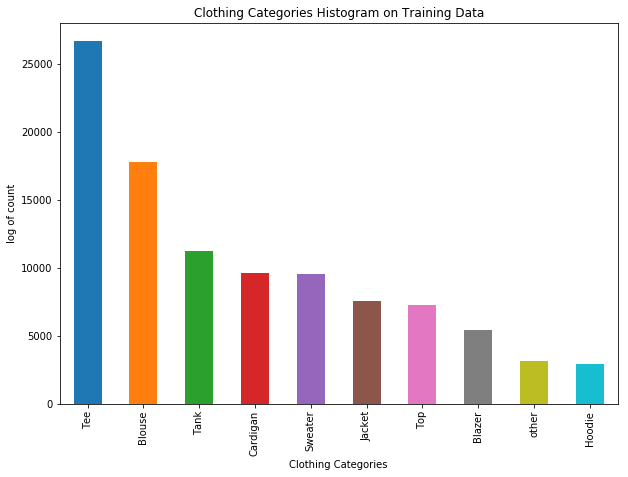

In [21]:
# Plot number of traning samples by category
plt.figure(figsize=(10,7))
ax = training_data["category_name"].value_counts().plot(kind='bar', logy=False)
ax.set_ylabel("log of count")
ax.set_xlabel("Clothing Categories")
ax.set_title("Clothing Categories Histogram on Training Data")
plt.show()